# Business Understanding
Meteorological forecasts are done by human experts. The forecasting takes a long time and extensive study and modeling of complex weather systems including physical properties. For this, supercomputers are necessary. Currently, Machine Learning is not used to aid in this endeavor. In light of the recent catastrophy in Rhineland-Palatinate, where numerous lives were lost and livelihoods were destroyed, we asked ourselves if knowledge can be gained by observing previous data and finding statistical regularities using ML. We want to evaluate if we can support traditional forecasting techniques using Machine Learning techniques. 

Our goal: to be able to forecast severe thunderstorms or extreme weather phenomena to support traditional forecasting in saving lives and property from destruction through weather.

# Pre - selection of attributes

Because we had a large amount of attributes to choose from (some of which had nothing to do with our target) we did a first round of feature selection.  

1. We researched on the web, which attributes contribute to extreme thunderstorms according to expert opinions.
2. We searched for a specific time interval with a lot of variance in the target variable. For this interval we downloaded ALL possible attributes and calculated the correlation coefficients for them. The attributes that have a high correlation coefficient were considered for the ML classification. Since our dataset is far too big to even download all features in a reasonable time, we needed to pre- select features with a shortened mock time frame.

In [1]:
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
data = nc.Dataset('./006.nc')
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2021-11-11 04:05:07 GMT by grib_to_netcdf-2.23.0: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data5/adaptor.mars.internal-1636599681.675195-17921-10-ce609838-d85c-43f5-a9f2-50e952ca0a1f.nc /cache/tmp/ce609838-d85c-43f5-a9f2-50e952ca0a1f-adaptor.mars.internal-1636593129.8500385-17921-2-tmp.grib
    dimensions(sizes): longitude(2), latitude(2), time(87672)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 totalx(time,latitude,longitude)
    groups: 

In [3]:
key = 'totalx'

In [4]:
data["totalx"]

<class 'netCDF4._netCDF4.Variable'>
int16 totalx(time, latitude, longitude)
    scale_factor: 0.0010945085090652458
    add_offset: 25.914048826525498
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: Total totals index
unlimited dimensions: 
current shape = (87672, 2, 2)
filling on

In [5]:
time = data['time'][:].data
data['time']

<ipython-input-5-e812dbe5d11c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  time = data['time'][:].data


<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (87672,)
filling on, default _FillValue of -2147483647 used

In [6]:
N = len(data[key])
shaped = data[key][:].data.reshape(N, -1)
m = np.mean(shaped, axis=1)
means = np.mean(shaped, axis=1)
print(key)
print(m.shape)
print(means.shape)

totalx
(87672,)
(87672,)


<ipython-input-6-ffc2c097ffe8>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shaped = data[key][:].data.reshape(N, -1)


In [7]:
# reshape into blocks of 24 hour intervals 
e = means.reshape(3653,24)

In [8]:
# needed to remove some entries to be able to have blocks of 168 hour (= 1 week) intervals
rem = means[:87528]
d = rem.reshape(521,168)

In [9]:
# calculate variance of the 1-week blocks
var = np.var(d, axis=1)

In [10]:
# retrieve week with maximal variance
np.argmax(var)

469

In [11]:
var[469]

308.7033850912894

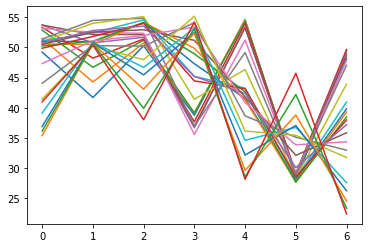

In [12]:
plt.plot(e[(469*7 - 7):(469*7)])
plt.show()

In [13]:
# calculate which week to retrieve from all data
time = time.reshape(3653,24)
time[(469*7 - 7):(469*7)]

array([[1051632, 1051633, 1051634, 1051635, 1051636, 1051637, 1051638,
        1051639, 1051640, 1051641, 1051642, 1051643, 1051644, 1051645,
        1051646, 1051647, 1051648, 1051649, 1051650, 1051651, 1051652,
        1051653, 1051654, 1051655],
       [1051656, 1051657, 1051658, 1051659, 1051660, 1051661, 1051662,
        1051663, 1051664, 1051665, 1051666, 1051667, 1051668, 1051669,
        1051670, 1051671, 1051672, 1051673, 1051674, 1051675, 1051676,
        1051677, 1051678, 1051679],
       [1051680, 1051681, 1051682, 1051683, 1051684, 1051685, 1051686,
        1051687, 1051688, 1051689, 1051690, 1051691, 1051692, 1051693,
        1051694, 1051695, 1051696, 1051697, 1051698, 1051699, 1051700,
        1051701, 1051702, 1051703],
       [1051704, 1051705, 1051706, 1051707, 1051708, 1051709, 1051710,
        1051711, 1051712, 1051713, 1051714, 1051715, 1051716, 1051717,
        1051718, 1051719, 1051720, 1051721, 1051722, 1051723, 1051724,
        1051725, 1051726, 1051727],
    

In [14]:
# hours since 1900-01-01 00:00:00.0

start_date = datetime(1900, 1, 1)
print(start_date + timedelta(hours = int(1051799)))

2019-12-27 23:00:00


Now we know which week to retrieve for the mock feature selection. The week ending on 2019-12-27 23:00:00.

In [15]:
week = nc.Dataset(r'1-week.nc')

In [16]:
#retrieve all variables
keys = []
for k in week.variables.keys():
    if k not in ['longitude', 'latitude', 'time',]:
        keys.append(k)

keys

['u100',
 'v100',
 'u10n',
 'u10',
 'v10n',
 'v10',
 'fg10',
 'd2m',
 't2m',
 'p140209',
 'anor',
 'isor',
 'bfi',
 'bld',
 'blh',
 'chnk',
 'cdir',
 'cbh',
 'cdww',
 'cape',
 'cin',
 'cp',
 'crr',
 'csf',
 'csfr',
 'uvb',
 'dctb',
 'lgws',
 'ewss',
 'e',
 'fal',
 'flsr',
 'fsr',
 'p140208',
 'zust',
 'z',
 'gwd',
 'hcc',
 'cvh',
 'istl1',
 'istl2',
 'istl3',
 'istl4',
 'i10fg',
 'iews',
 'ilspf',
 'ie',
 'inss',
 'ishf',
 'kx',
 'lblt',
 'cl',
 'dl',
 'licd',
 'lict',
 'lmld',
 'lmlt',
 'lshf',
 'ltlt',
 'lsm',
 'lsp',
 'lspf',
 'lsrr',
 'lsf',
 'lssfr',
 'lai_hv',
 'lai_lv',
 'lcc',
 'cvl',
 'mx2t',
 'hmax',
 'mxtpr',
 'mbld',
 'mcpr',
 'mcsr',
 'mdts',
 'mdww',
 'megwss',
 'metss',
 'mer',
 'mgwd',
 'mlspf',
 'mlspr',
 'mlssr',
 'mngwss',
 'mntss',
 'mpts',
 'mpww',
 'mper',
 'mror',
 'msl',
 'mser',
 'msr',
 'msmr',
 'msqs',
 'mssror',
 'msdrswrf',
 'msdrswrfcs',
 'msdwlwrf',
 'msdwlwrfcs',
 'msdwswrf',
 'msdwswrfcs',
 'msdwuvrf',
 'mslhf',
 'msnlwrf',
 'msnlwrfcs',
 'msnswrf',
 'm

In [17]:
n = pd.DataFrame()
for key in keys:
    a = week[key][:].data
    a = a.reshape(168,4)
    b = np.mean(a, axis=1)
    print(a.shape)
    print(b.shape)
    n[key] = b
    print('================')

<ipython-input-17-67cf7706eb17>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = week[key][:].data


(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)
(168,)
(168, 4)

In [18]:
week['sshf']

<class 'netCDF4._netCDF4.Variable'>
int16 sshf(time, latitude, longitude)
    scale_factor: 5.35337921352601
    add_offset: 94527.51081039324
    _FillValue: -32767
    missing_value: -32767
    units: J m**-2
    long_name: Surface sensible heat flux
    standard_name: surface_upward_sensible_heat_flux
unlimited dimensions: 
current shape = (168, 2, 2)
filling on

In [19]:
n[]

SyntaxError: invalid syntax (<ipython-input-19-cef41309a892>, line 1)

Now we have a dataframe of 262 attributes, some of those are not relevant for our problem. We have already some attributes that we suspect will be relevant (according to experts). Now we want to find relevant features that we might have missed.

In [20]:
target = 'totalx'
def correlation_results(df):
    corr_m = df.corr()
    idx = corr_m[target].sort_values(ascending=False)
    for i in range(len(idx)):
        print( str(idx[i]) + '  ---->   '+ idx.keys()[i] )

In [21]:
correlation_results(n)

1.0  ---->   totalx
0.8809247697757576  ---->   kx
0.8187126128499432  ---->   strdc
0.8187116695457192  ---->   msdwlwrfcs
0.7258345700463361  ---->   d2m
0.6794556943720832  ---->   t2m
0.6781961565311313  ---->   p71.162
0.6732676627140172  ---->   zust
0.6694122859384102  ---->   tcwv
0.6626566129859497  ---->   fg10
0.6612484777547533  ---->   i10fg
0.642648036738457  ---->   tcw
0.6288949871118238  ---->   mx2t
0.6225505047631352  ---->   mn2t
0.6214999370644869  ---->   deg0l
0.5976200438619342  ---->   lai_hv
0.5975480365358024  ---->   lai_lv
0.5906167445763868  ---->   stl4
0.5891668406854781  ---->   u100
0.5774153983271163  ---->   ishf
0.5766453863820812  ---->   megwss
0.5763045798177148  ---->   lgws
0.5714939600688236  ---->   stl1
0.5643437119781696  ---->   bld
0.5643212963807933  ---->   mbld
0.563458385894005  ---->   sshf
0.5634492076274703  ---->   msshf
0.5573123955697628  ---->   skt
0.5550060411991772  ---->   blh
0.548893258423599  ---->   iews
0.5463578927456

In [22]:
# define an arbitrary cut off coefficient of 0.40
important = []
corr_m = n.corr()
idx = corr_m[target].sort_values(ascending=False)
for i in range(len(idx)):
    if np.absolute(idx[i]) > 0.40:
        important.append(idx.keys()[i])
        print( str(idx[i]) + '  ---->   '+ idx.keys()[i] )

1.0  ---->   totalx
0.8809247697757576  ---->   kx
0.8187126128499432  ---->   strdc
0.8187116695457192  ---->   msdwlwrfcs
0.7258345700463361  ---->   d2m
0.6794556943720832  ---->   t2m
0.6781961565311313  ---->   p71.162
0.6732676627140172  ---->   zust
0.6694122859384102  ---->   tcwv
0.6626566129859497  ---->   fg10
0.6612484777547533  ---->   i10fg
0.642648036738457  ---->   tcw
0.6288949871118238  ---->   mx2t
0.6225505047631352  ---->   mn2t
0.6214999370644869  ---->   deg0l
0.5976200438619342  ---->   lai_hv
0.5975480365358024  ---->   lai_lv
0.5906167445763868  ---->   stl4
0.5891668406854781  ---->   u100
0.5774153983271163  ---->   ishf
0.5766453863820812  ---->   megwss
0.5763045798177148  ---->   lgws
0.5714939600688236  ---->   stl1
0.5643437119781696  ---->   bld
0.5643212963807933  ---->   mbld
0.563458385894005  ---->   sshf
0.5634492076274703  ---->   msshf
0.5573123955697628  ---->   skt
0.5550060411991772  ---->   blh
0.548893258423599  ---->   iews
0.5463578927456

In [23]:
# reduced 261 attributes to 75 relevant attributes
len(important)

75

In [24]:
# obtain long name of attribute to determine if attribute importance is feasable
# we compare these values to our researched list
for k in important:
    print(k + ' = ' + week[k].long_name)

totalx = Total totals index
kx = K index
strdc = Surface thermal radiation downward clear-sky
msdwlwrfcs = Mean surface downward long-wave radiation flux, clear sky
d2m = 2 metre dewpoint temperature
t2m = 2 metre temperature
p71.162 = Vertical integral of eastward water vapour flux
zust = Friction velocity
tcwv = Total column water vapour
fg10 = 10 metre wind gust since previous post-processing
i10fg = Instantaneous 10 metre wind gust
tcw = Total column water
mx2t = Maximum temperature at 2 metres since previous post-processing
mn2t = Minimum temperature at 2 metres since previous post-processing
deg0l = 0 degrees C isothermal level (atm)
lai_hv = Leaf area index, high vegetation
lai_lv = Leaf area index, low vegetation
stl4 = Soil temperature level 4
u100 = 100 metre U wind component
ishf = Instantaneous surface sensible heat flux
megwss = Mean eastward gravity wave surface stress
lgws = Eastward gravity wave surface stress
stl1 = Soil temperature level 1
bld = Boundary layer dissipa

<ipython-input-24-9882575df826>:4: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(k + ' = ' + week[k].long_name)


### Result

We have now a list of possibly important weather features for our target variable. We'll start downloading the full data set and start with data exploration.

# Data Exploration

### Handling time series
Since we haven't learned about encoding / handling of time series, we try to remove most of the time based component from the data set. We treat every 24 hour period as conditionally independent and take statistics of each day as independent features in our dataset.

In [25]:
file01 = nc.Dataset('./001.nc')
file02 = nc.Dataset('./002.nc')
file03 = nc.Dataset('./003.nc')
file04 = nc.Dataset('./004.nc')
file05 = nc.Dataset('./005.nc')
file06 = nc.Dataset('./006.nc')
file07 = nc.Dataset('./007.nc')
# file08 = nc.Dataset('./008.nc') ptype duplicate
# file11 = nc.Dataset('./011.nc')
file12 = nc.Dataset('./012.nc')
file13 = nc.Dataset('./013.nc')
#file14 = nc.Dataset('./014.nc') geopotential constant
file15 = nc.Dataset('./015.nc')
file16 = nc.Dataset('./016.nc')
file18 = nc.Dataset('./018.nc')
file19 = nc.Dataset('./019.nc')

file01a = nc.Dataset('./a01.nc')
file02a = nc.Dataset('./a02.nc')
file03a = nc.Dataset('./a03.nc')
file04a = nc.Dataset('./a04.nc')
file05a = nc.Dataset('./a05.nc')
file06a = nc.Dataset('./a06.nc')

file28 = nc.Dataset('./028.nc')
file29 = nc.Dataset('./029.nc')
file30 = nc.Dataset('./030.nc')
file31 = nc.Dataset('./031.nc')
file32 = nc.Dataset('./032.nc')
file33 = nc.Dataset('./033.nc')
file34 = nc.Dataset('./034.nc')
file35 = nc.Dataset('./035.nc')
file36 = nc.Dataset('./036.nc')
file37 = nc.Dataset('./037.nc')
file38 = nc.Dataset('./038.nc')
file39 = nc.Dataset('./039.nc')
file40 = nc.Dataset('./040.nc')
file41 = nc.Dataset('./041.nc')

file42 = nc.Dataset('./042.nc')
file43 = nc.Dataset('./043.nc')
file44 = nc.Dataset('./044.nc')
file45 = nc.Dataset('./045.nc')
file46 = nc.Dataset('./046.nc')
file47 = nc.Dataset('./047.nc')
file48 = nc.Dataset('./048.nc')
file49 = nc.Dataset('./049.nc')
file50 = nc.Dataset('./050.nc')

file51 = nc.Dataset(r'C:\Users\annal\Desktop\Vorlesungen\DM Project\cloud_medium_cover.nc')
file52 = nc.Dataset(r'C:\Users\annal\Desktop\Vorlesungen\DM Project\cloud_high_cover.nc')
file53 = nc.Dataset(r'C:\Users\annal\Desktop\Vorlesungen\DM Project\cloud_low_cover.nc')

In [26]:
files = [
    file01,
    file02,
    file03,
    file04,
    file05,
    file06,
    file07,
    #file08,
    #file09,
    #file10,
    #file11,
    file12,
    file13,
    #file14,
    file15,
    file16,
    #file17,
    file18,
    file19,
    #file20,
    #file21,
    #file22,
    #file23,
    #file24,
    #file25,
    #file26,
    #file27,
    file01a,
    file02a,
    file03a,
    file04a,
    file05a,
    file06a,
    file28,
    file29,
    file30,
    file31,
    file32,
    file33,
    file34,
    file35,
    file36,
    file37,
    file38,
    file39,
    file40,
    file41,
    file42,
    file43,
    file44,
    file45,
    file46,
    file47,
    file48,
    file49,
    file50,
    file51,
    file52,
    file53,
    
]

In [27]:
#retrieve all variables from files
keys = []
for i in range (len(files)):
    all_keys = files[i].variables.keys()
    for k in all_keys:
        if k not in ['longitude', 'latitude', 'time',]:
            keys.append(k)
            print(i+1)
            print(k)
    print("------------")

1
u10n
------------
2
sp
------------
3
u100
------------
4
d2m
------------
5
skt
------------
6
totalx
------------
7
ptype
------------
8
zust
------------
9
sdfor
------------
10
kx
------------
11
v10n
------------
12
stl1
------------
13
lmlt
------------
14
tciw
------------
15
tclw
------------
16
cbh
------------
17
tcc
------------
18
sshf
------------
19
ishf
------------
20
strdc
------------
21
msdwlwrfcs
------------
22
p61.162
------------
23
p54.162
------------
24
p60.162
------------
25
t2m
------------
26
p71.162
------------
27
p53.162
------------
28
tcwv
------------
29
tcw
------------
30
p62.162
------------
31
bld
------------
32
blh
------------
33
deg0l
------------
34
vst
------------
35
ust
------------
36
tp
------------
37
tcslw
------------
38
lsrr
------------
39
ilspf
------------
40
cape
------------
41
u100
------------
42
u10n
------------
43
mcc
------------
44
hcc
------------
45
lcc
------------


In [28]:
len(keys)

45

In [29]:
for i in range(len(keys)):
    key = keys[i]
    print(files[i][key].long_name)

Neutral wind at 10 m u-component
Surface pressure
100 metre U wind component
2 metre dewpoint temperature
Skin temperature
Total totals index
Precipitation type
Friction velocity
Standard deviation of filtered subgrid orography
K index
Neutral wind at 10 m v-component
Soil temperature level 1
Lake mix-layer temperature
Total column cloud ice water
Total column cloud liquid water
Cloud base height
Total cloud cover
Surface sensible heat flux
Instantaneous surface sensible heat flux
Surface thermal radiation downward clear-sky
Mean surface downward long-wave radiation flux, clear sky
Vertical integral of potential+internal energy
Vertical integral of temperature
Vertical integral of thermal energy
2 metre temperature
Vertical integral of eastward water vapour flux
Vertical integral of mass of atmosphere
Total column water vapour
Total column water
Vertical integral of potential+internal+latent energy
Boundary layer dissipation
Boundary layer height
0 degrees C isothermal level (atm)
V-co

<ipython-input-29-bfcfd3240e39>:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(files[i][key].long_name)


In [30]:
df = pd.DataFrame()
for i in range (len(files)):
    print(files[i][keys[i]].long_name)
    a = files[i][keys[i]][:].data
    a = a.reshape(87672, -1)
    b = np.mean(a, axis=1)
    b = b.reshape(3653, 24)
    #df['min_'+keys[i]] = np.min(b, axis=1)
    #df['max_'+keys[i]] = np.max(b, axis=1)
    df['mean_' + keys[i]] = np.mean(b, axis =1)
    #df['var_' + keys[i]] = np.var(b, axis=1)
    print(b.shape)

<ipython-input-30-a1bea8073f3e>:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(files[i][keys[i]].long_name)
<ipython-input-30-a1bea8073f3e>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = files[i][keys[i]][:].data


Neutral wind at 10 m u-component
(3653, 24)
Surface pressure
(3653, 24)
100 metre U wind component
(3653, 24)
2 metre dewpoint temperature
(3653, 24)
Skin temperature
(3653, 24)
Total totals index
(3653, 24)
Precipitation type
(3653, 24)
Friction velocity
(3653, 24)
Standard deviation of filtered subgrid orography
(3653, 24)
K index
(3653, 24)
Neutral wind at 10 m v-component
(3653, 24)
Soil temperature level 1
(3653, 24)
Lake mix-layer temperature
(3653, 24)
Total column cloud ice water
(3653, 24)
Total column cloud liquid water
(3653, 24)
Cloud base height
(3653, 24)
Total cloud cover
(3653, 24)
Surface sensible heat flux
(3653, 24)
Instantaneous surface sensible heat flux
(3653, 24)
Surface thermal radiation downward clear-sky
(3653, 24)
Mean surface downward long-wave radiation flux, clear sky
(3653, 24)
Vertical integral of potential+internal energy
(3653, 24)
Vertical integral of temperature
(3653, 24)
Vertical integral of thermal energy
(3653, 24)
2 metre temperature
(3653, 24)


## Finished assembly of data frame

In [31]:
df

,mean_u10n,mean_sp,mean_u100,mean_d2m,mean_skt,mean_totalx,mean_ptype,mean_zust,mean_sdfor,mean_kx,...,mean_vst,mean_ust,mean_tp,mean_tcslw,mean_lsrr,mean_ilspf,mean_cape,mean_mcc,mean_hcc,mean_lcc
0,1.514804,100066.638959,3.452743,272.354215,272.197156,28.871947,2.750027,0.128811,34.206648,-5.533518,...,-32767.0,-32767.0,0.000029,0.233133,4.755187e-06,0.599378,9.374736,0.172447,-5.551115e-17,0.892420
1,1.258293,100170.593400,3.035505,272.052127,271.166422,30.291684,4.625008,0.133434,34.206648,-13.131095,...,-32767.0,-32767.0,0.000010,0.081389,2.988573e-07,0.369991,13.720523,0.077058,-5.551115e-17,0.538442
2,0.625798,100300.192825,2.158679,270.541523,270.348920,33.781080,5.104156,0.077228,34.206648,-11.881619,...,-32767.0,-32767.0,0.000005,0.124082,0.000000e+00,0.559767,15.403435,0.077913,3.023953e-01,0.734415
3,-0.413083,99901.154399,-0.546596,267.678637,267.478934,34.847245,4.999985,0.062465,34.206648,-14.010293,...,-32767.0,-32767.0,0.000005,0.053091,0.000000e+00,0.551082,6.907125,0.294804,5.811599e-01,0.511254
4,-1.096422,99276.268043,-1.340918,266.092413,267.691344,36.648213,4.749989,0.133923,34.206648,-3.991905,...,-32767.0,-32767.0,0.000002,0.057305,0.000000e+00,0.344113,2.384820,0.142499,3.814432e-01,0.609097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,0.301175,97670.076078,1.392121,272.159259,275.114354,38.744972,2.270866,0.393546,34.206648,3.796433,...,-32767.0,-32767.0,0.000226,0.073905,9.268713e-05,0.284797,5.928724,0.533122,9.995446e-01,0.599711
3649,0.070719,96064.658816,0.934923,275.895040,275.615978,51.397479,1.229208,0.235099,34.206648,13.421346,...,-32767.0,-32767.0,0.000322,0.045416,6.522893e-05,0.611798,8.895169,0.566535,8.350888e-01,0.286988
3650,1.831054,97003.024807,3.941376,274.408335,274.857152,54.711400,1.437538,0.269854,34.206648,17.387979,...,-32767.0,-32767.0,0.000197,0.040773,1.339942e-05,0.552615,28.497553,0.478682,5.995655e-01,0.479420
3651,1.569105,98303.762344,3.974165,274.734868,274.534005,53.840718,1.000046,0.209653,34.206648,15.900618,...,-32767.0,-32767.0,0.000022,0.038688,2.975308e-06,0.545493,27.155701,0.301340,2.122550e-01,0.355306


We observe that all attributes are numerical.

In [32]:
df.isnull().values.any()

False

No null / NaN values.

### First pass of correlation coefficient

In [33]:
target = 'mean_totalx'
correlation_results(df)

1.0  ---->   mean_totalx
0.7828707069733708  ---->   mean_kx
0.3905271690455183  ---->   mean_d2m
0.36745074481142675  ---->   mean_tcw
0.3652267613399353  ---->   mean_tcwv
0.3408910231836148  ---->   mean_cbh
0.33786478361832445  ---->   mean_mcc
0.31843925968838027  ---->   mean_strdc
0.3184391487648552  ---->   mean_msdwlwrfcs
0.29051555893365344  ---->   mean_tciw
0.28756782971754014  ---->   mean_t2m
0.27612302129673616  ---->   mean_tp
0.2750826761074101  ---->   mean_stl1
0.2698925727910842  ---->   mean_skt
0.26378607371876567  ---->   mean_cape
0.24405569602182425  ---->   mean_hcc
0.24206783048334604  ---->   mean_u100
0.23507317278508427  ---->   mean_tcc
0.23487421130862335  ---->   mean_u10n
0.19780469953556992  ---->   mean_lmlt
0.1741625817239608  ---->   mean_p71.162
0.15961495186624514  ---->   mean_blh
0.15848806780325642  ---->   mean_lsrr
0.14521873063077412  ---->   mean_ilspf
0.14510462067513213  ---->   mean_v10n
0.14005894507979683  ---->   mean_zust
0.08706175

In [34]:
# remove identified constants

df = df.drop(
    labels=[
        #'min_sdfor',
        #'max_sdfor',
        'mean_sdfor',
        #'var_sdfor',
        #'min_vst',
        #'max_vst',
        'mean_vst',
        #'var_vst',
        #'min_ust',
        #'max_ust',
        'mean_ust',
        #'var_ust'
    ],
    axis = 1
)

#  Data Exploration

In [35]:
sub_df = pd.DataFrame()
sub_df['mean_mcc'] = df['mean_mcc']
sub_df['mean_hcc'] = df['mean_hcc']
sub_df['mean_lcc'] = df['mean_lcc']

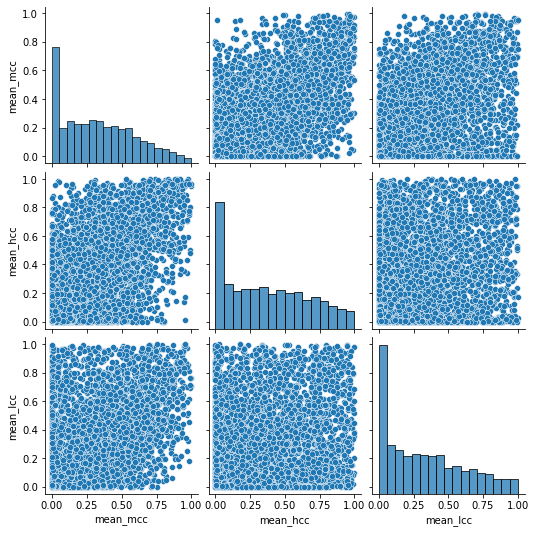

In [36]:
import seaborn as sn
sn.pairplot(sub_df)

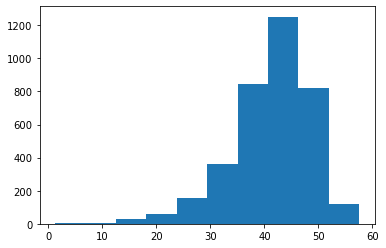

In [37]:
# plot unbinned target distribution
plt.hist(df['mean_totalx'])
plt.show()

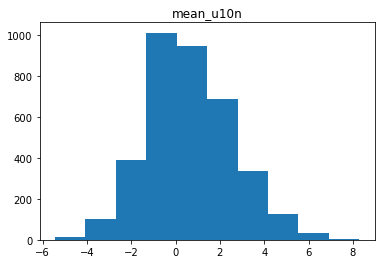

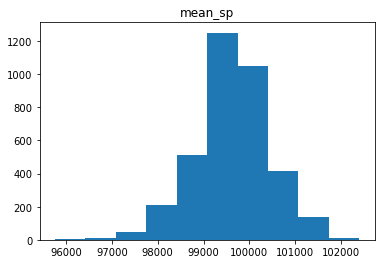

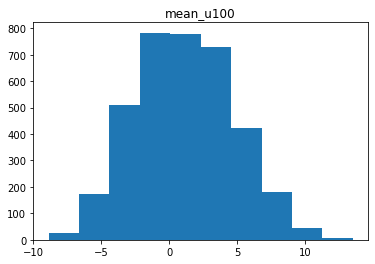

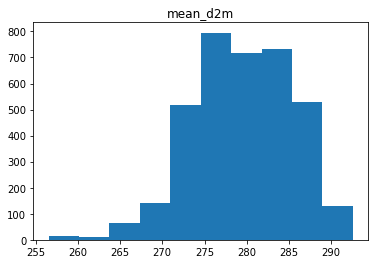

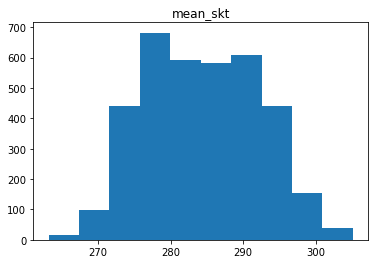

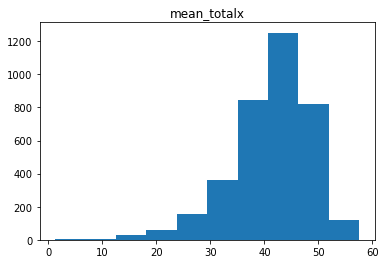

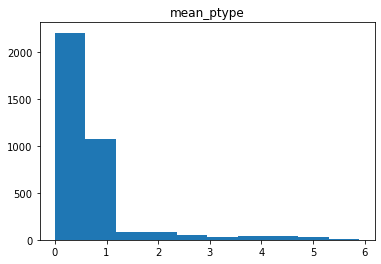

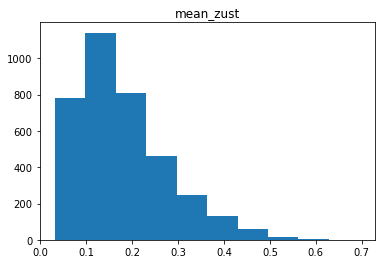

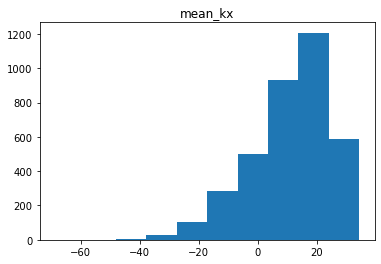

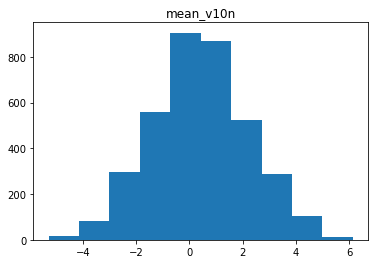

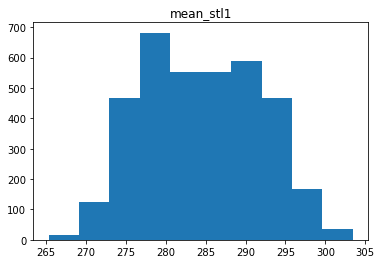

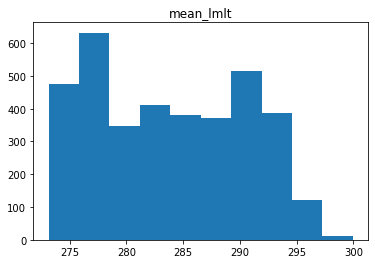

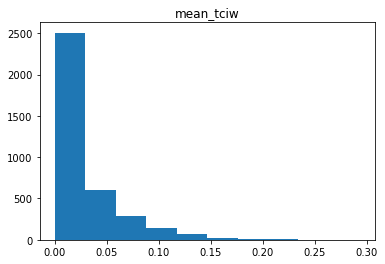

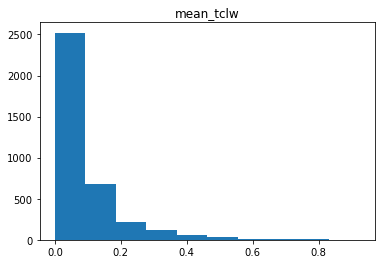

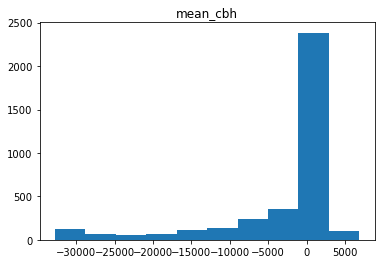

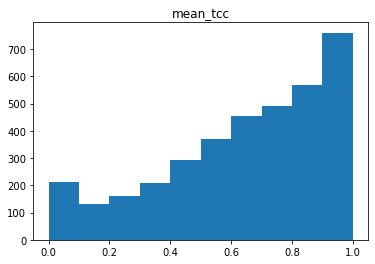

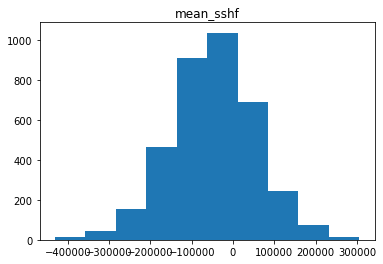

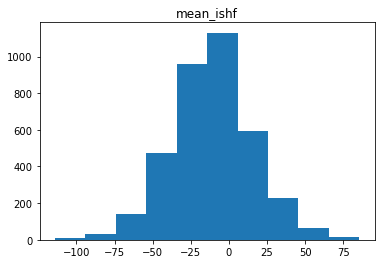

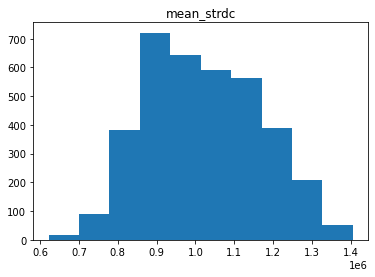

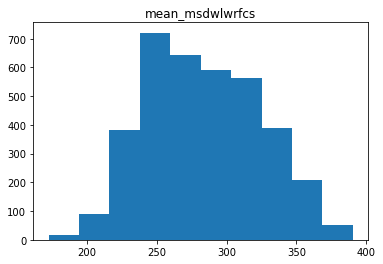

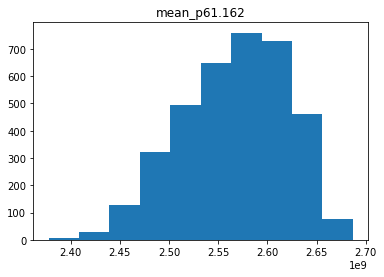

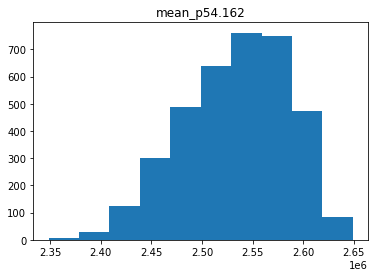

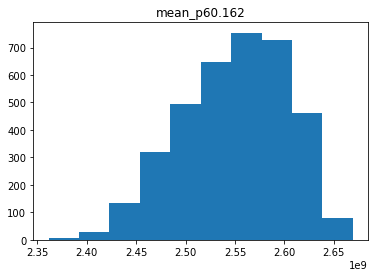

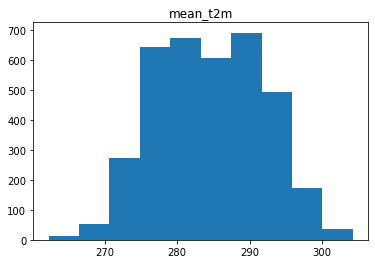

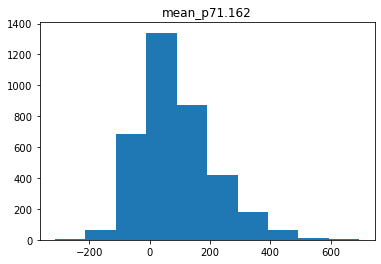

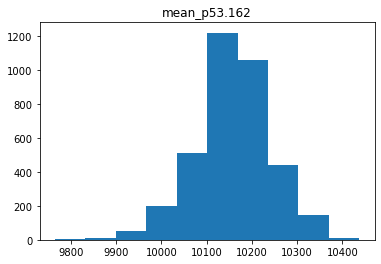

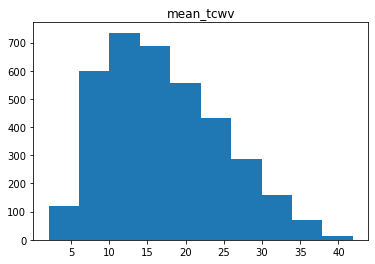

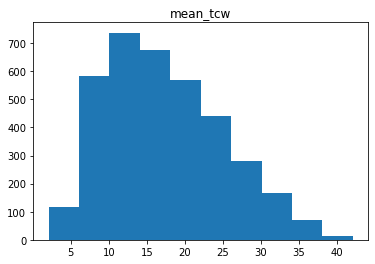

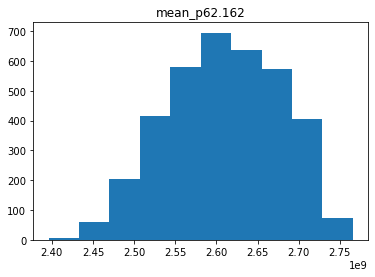

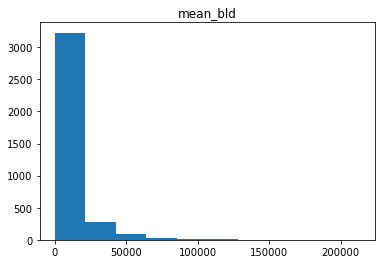

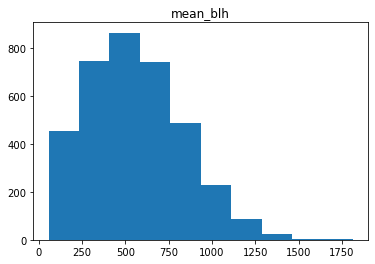

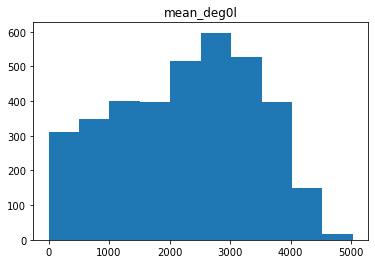

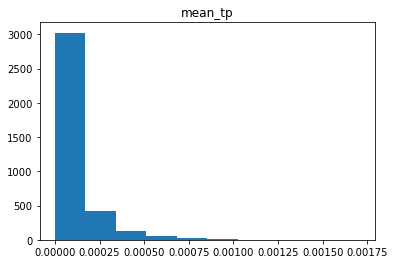

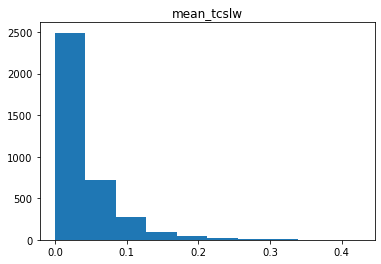

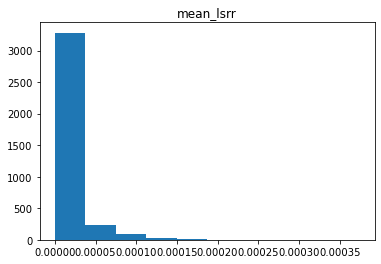

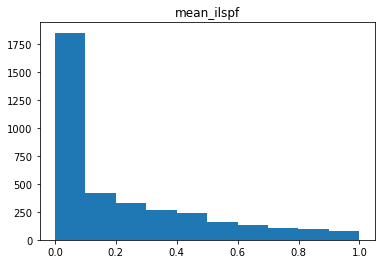

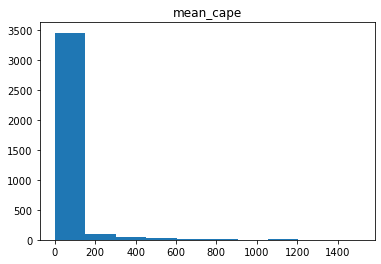

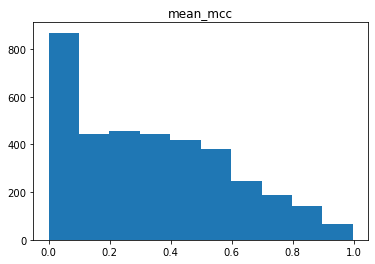

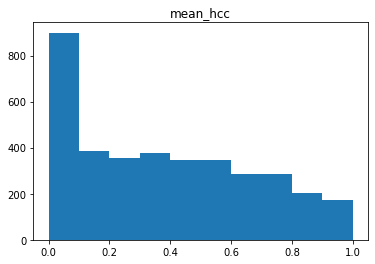

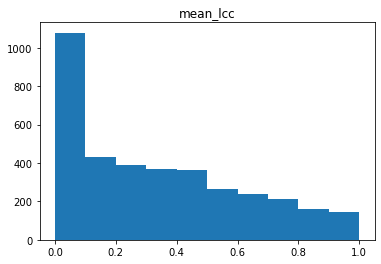

In [38]:
# plot all distributions 
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [39]:
print("Info of df: ",df.info())
print("Describe df: ",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_u10n        3653 non-null   float64
 1   mean_sp          3653 non-null   float64
 2   mean_u100        3653 non-null   float64
 3   mean_d2m         3653 non-null   float64
 4   mean_skt         3653 non-null   float64
 5   mean_totalx      3653 non-null   float64
 6   mean_ptype       3653 non-null   float64
 7   mean_zust        3653 non-null   float64
 8   mean_kx          3653 non-null   float64
 9   mean_v10n        3653 non-null   float64
 10  mean_stl1        3653 non-null   float64
 11  mean_lmlt        3653 non-null   float64
 12  mean_tciw        3653 non-null   float64
 13  mean_tclw        3653 non-null   float64
 14  mean_cbh         3653 non-null   float64
 15  mean_tcc         3653 non-null   float64
 16  mean_sshf        3653 non-null   float64
 17  mean_ishf     

# Feature Engineering

#### Hypothesis 1: The relation of high to low cloud cover has relevance for thunderstorm prediction.

In [40]:
agg = pd.DataFrame()
agg['medium/low'] = df['mean_mcc'] / df['mean_lcc']
agg['low/medium'] = df['mean_lcc'] / df['mean_mcc']
agg['medium/high'] = df['mean_mcc'] / df['mean_hcc']
agg['high/medium'] = df['mean_hcc'] / df['mean_mcc']
agg['low/high'] = df['mean_lcc'] / df['mean_hcc']
agg['high/low'] = df['mean_hcc'] / df['mean_lcc']
agg['mean_totalx'] = df['mean_totalx']

In [41]:
correlation_results(agg)

1.0  ---->   mean_totalx
0.13554696044722395  ---->   low/high
0.07812572459644565  ---->   high/low
0.02908762918556815  ---->   medium/high
-0.00703797856358384  ---->   medium/low
-0.19670566294567332  ---->   high/medium
-0.20092471450306107  ---->   low/medium


#### Hypothesis 2: Some feature expressions can be boosted with basic arithmetics. We aggregate all features and check again for relevance.

While aggregating we need to check for special cases e.g. trying to take the root of a negative value or taking the log of values < 0.

In [42]:
# make a copy of original dataframe df to not accidentally loose featuresS
data = df

In [43]:
aggSquare = pd.DataFrame()
aggRoot = pd.DataFrame()
aggLog = pd.DataFrame()

In [44]:
# square it
for col in data.columns:
    aggSquare[col] = data[col]**2

In [45]:
# take the square root
for col in data.columns:
    aggRoot[col] = np.sqrt(data[col])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
# take the logarithm
for col in data.columns:
    aggLog[col] = np.log(data[col])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [47]:
# taking the root of negative values is forbidden
# when trying to take the root of negative values we produce NaN values
# we detect and remove the features that produce the NaN values

null_columns=aggRoot.columns[aggRoot.isnull().any()]
nulls = pd.DataFrame()
aggRoot[null_columns].isnull().sum()

aggRoot = aggRoot.drop(labels=null_columns, axis = 1)

In [48]:
aggRoot.isnull().values.any()

False

In [49]:
# the logarithm is not defined for values < 0
# we need to remove the features that behave like this

null_columns=aggLog.columns[aggLog.isnull().any()]
nulls = pd.DataFrame()
aggLog[null_columns].isnull().sum()

aggLog = aggLog.drop(labels=null_columns, axis = 1)

In [50]:
aggLog.isnull().values.any()

False

In [51]:
# the logarithm of 0 is defined as -inf
# since we do not want to change overall behavior of logarithm
# we replace -inf with -100, for this we took into consideration the scale that we are operating on
aggLog = aggLog.replace(-np.inf, -100)

To evaluate if we could boost feature expression through our aggregation, we compute again the correlation coefficient for the actual feature and compare it to the correlation coefficient for the aggregated feature.

In [52]:
correlation_results(df)

1.0  ---->   mean_totalx
0.7828707069733708  ---->   mean_kx
0.3905271690455183  ---->   mean_d2m
0.36745074481142675  ---->   mean_tcw
0.3652267613399353  ---->   mean_tcwv
0.3408910231836148  ---->   mean_cbh
0.33786478361832445  ---->   mean_mcc
0.31843925968838027  ---->   mean_strdc
0.3184391487648552  ---->   mean_msdwlwrfcs
0.29051555893365344  ---->   mean_tciw
0.28756782971754014  ---->   mean_t2m
0.27612302129673616  ---->   mean_tp
0.2750826761074101  ---->   mean_stl1
0.2698925727910842  ---->   mean_skt
0.26378607371876567  ---->   mean_cape
0.24405569602182425  ---->   mean_hcc
0.24206783048334604  ---->   mean_u100
0.23507317278508427  ---->   mean_tcc
0.23487421130862335  ---->   mean_u10n
0.19780469953556992  ---->   mean_lmlt
0.1741625817239608  ---->   mean_p71.162
0.15961495186624514  ---->   mean_blh
0.15848806780325642  ---->   mean_lsrr
0.14521873063077412  ---->   mean_ilspf
0.14510462067513213  ---->   mean_v10n
0.14005894507979683  ---->   mean_zust
0.08706175

In [53]:
correlation_results(aggRoot)

1.0  ---->   mean_totalx
0.42253529775386256  ---->   mean_mcc
0.39973617667690275  ---->   mean_cape
0.399418316124551  ---->   mean_tcw
0.3977324739406064  ---->   mean_d2m
0.3965728044823387  ---->   mean_tcwv
0.3797162401985846  ---->   mean_tp
0.3748761076665531  ---->   mean_tciw
0.32953311253630635  ---->   mean_strdc
0.3295330426280886  ---->   mean_msdwlwrfcs
0.2964806951316186  ---->   mean_t2m
0.2828559940300755  ---->   mean_stl1
0.2791304887147935  ---->   mean_skt
0.2595683061193876  ---->   mean_tcc
0.23853529733905873  ---->   mean_lsrr
0.20418153754240795  ---->   mean_lmlt
0.20035150159724827  ---->   mean_tcslw
0.17864367074788098  ---->   mean_blh
0.16036931241238245  ---->   mean_ilspf
0.1454677543309039  ---->   mean_zust
0.14323908702827756  ---->   mean_tclw
0.09288258404836149  ---->   mean_bld
0.07497804394361014  ---->   mean_ptype
0.05476223277296742  ---->   mean_deg0l
-0.006717230324465058  ---->   mean_p62.162
-0.13648777476013413  ---->   mean_p60.162
-0

In [54]:
correlation_results(aggSquare)

1.0  ---->   mean_totalx
0.3624912025486563  ---->   mean_d2m
0.3059361884977817  ---->   mean_tcw
0.3050978880908883  ---->   mean_tcwv
0.2923393512251041  ---->   mean_kx
0.287809408820737  ---->   mean_strdc
0.2878092414594116  ---->   mean_msdwlwrfcs
0.2599230075287145  ---->   mean_t2m
0.2496204063258111  ---->   mean_stl1
0.24222679922776708  ---->   mean_skt
0.22435055681529772  ---->   mean_mcc
0.1959429556897357  ---->   mean_hcc
0.18354331455540518  ---->   mean_tcc
0.17669558789898446  ---->   mean_lmlt
0.17040908842460142  ---->   mean_tciw
0.1523045972477347  ---->   mean_cape
0.12861760871805913  ---->   mean_tp
0.1255571207848536  ---->   mean_zust
0.11850803724713345  ---->   mean_blh
0.11019930006536033  ---->   mean_ilspf
0.09318437242218797  ---->   mean_v10n
0.08389135466133248  ---->   mean_p71.162
0.06532139139940754  ---->   mean_bld
0.06044725185879647  ---->   mean_lsrr
0.049904736702217976  ---->   mean_u10n
0.029763180092390984  ---->   mean_u100
0.0176016561

In [55]:
correlation_results(aggLog)

1.0  ---->   mean_totalx
0.42005690352480435  ---->   mean_tcw
0.41802966863336205  ---->   mean_mcc
0.4168191175728569  ---->   mean_tcwv
0.3906373827988341  ---->   mean_d2m
0.34236706632113106  ---->   mean_cape
0.32945059086169015  ---->   mean_strdc
0.3294505742673247  ---->   mean_msdwlwrfcs
0.32705548362125525  ---->   mean_tp
0.29481281830569  ---->   mean_t2m
0.28856225832644966  ---->   mean_tcslw
0.2803085336062456  ---->   mean_stl1
0.27843442500011484  ---->   mean_skt
0.2540298886361609  ---->   mean_tclw
0.23266145372774003  ---->   mean_tciw
0.23212527745152484  ---->   mean_lsrr
0.20254377166315238  ---->   mean_lmlt
0.1921856595423757  ---->   mean_ptype
0.18687997161172787  ---->   mean_blh
0.15592659967310196  ---->   mean_deg0l
0.14556282672371074  ---->   mean_zust
0.1373442452496373  ---->   mean_tcc
0.11167911607548839  ---->   mean_ilspf
0.08468623765045234  ---->   mean_bld
0.0032665582288363164  ---->   mean_p62.162
-0.11972567805136762  ---->   mean_p60.162


Now we have four dataframes à 160 attributes. In order to keep computation time feasable we need to implement feature selection!

# Feature Selection

In [56]:
def merge_frames(og, dataFrame, prefix):
    for col in dataFrame.columns:
        if not 'target+1' in col:
            column_name = prefix + str(col)
            og[column_name] = dataFrame[col]
    return og
            

In [57]:
merged = pd.DataFrame()
merged = merge_frames(merged, data, 'og_')
merged = merge_frames(merged, aggSquare, 'squared_')
merged = merge_frames(merged, aggLog, 'log_')
merged = merge_frames(merged, aggRoot, 'root_')

In [58]:
merged

,og_mean_u10n,og_mean_sp,og_mean_u100,og_mean_d2m,og_mean_skt,og_mean_totalx,og_mean_ptype,og_mean_zust,og_mean_kx,og_mean_v10n,...,root_mean_p62.162,root_mean_bld,root_mean_blh,root_mean_deg0l,root_mean_tp,root_mean_tcslw,root_mean_lsrr,root_mean_ilspf,root_mean_cape,root_mean_mcc
0,1.514804,100066.638959,3.452743,272.354215,272.197156,28.871947,2.750027,0.128811,-5.533518,1.012167,...,50492.458119,52.849862,13.181203,27.013148,0.005403,0.482839,0.002181,0.774195,3.061819,0.415268
1,1.258293,100170.593400,3.035505,272.052127,271.166422,30.291684,4.625008,0.133434,-13.131095,-1.068212,...,50062.562179,53.450787,17.178033,8.900966,0.003121,0.285288,0.000547,0.608269,3.704122,0.277594
2,0.625798,100300.192825,2.158679,270.541523,270.348920,33.781080,5.104156,0.077228,-11.881619,0.274895,...,50010.147887,29.067978,11.446397,1.198019,0.002199,0.352253,0.000000,0.748176,3.924721,0.279129
3,-0.413083,99901.154399,-0.546596,267.678637,267.478934,34.847245,4.999985,0.062465,-14.010293,1.033547,...,49882.912931,24.691451,11.550852,0.000000,0.002261,0.230415,0.000000,0.742349,2.628141,0.542959
4,-1.096422,99276.268043,-1.340918,266.092413,267.691344,36.648213,4.749989,0.133923,-3.991905,1.798511,...,49966.240883,68.240764,12.829602,16.263965,0.001455,0.239385,0.000000,0.586611,1.544286,0.377490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,0.301175,97670.076078,1.392121,272.159259,275.114354,38.744972,2.270866,0.393546,3.796433,5.682410,...,49723.955219,222.753168,30.078352,22.948625,0.015042,0.271854,0.009627,0.533663,2.434897,0.730152
3649,0.070719,96064.658816,0.934923,275.895040,275.615978,51.397479,1.229208,0.235099,13.421346,3.212596,...,49044.093084,123.066914,22.351888,24.371086,0.017946,0.213111,0.008076,0.782175,2.982477,0.752685
3650,1.831054,97003.024807,3.941376,274.408335,274.857152,54.711400,1.437538,0.269854,17.387979,3.038717,...,49202.013741,126.806489,23.851330,22.589331,0.014028,0.201922,0.003661,0.743381,5.338310,0.691869
3651,1.569105,98303.762344,3.974165,274.734868,274.534005,53.840718,1.000046,0.209653,15.900618,2.215201,...,49590.467496,75.186341,18.920871,22.445073,0.004728,0.196692,0.001725,0.738575,5.211113,0.548945


In [59]:
k_best = []
def collect_k_best(df, k=100):
    k_stem = []
    corr_m = df.corr()
    idx = corr_m['og_mean_totalx']
    # take the absolute value
    idx = np.absolute(idx).sort_values(ascending=False)
    for i in range(len(idx)):
        key = idx.keys()[i]
        temp_key = key.split('_', 1)[1]
        if len(k_best) < k and temp_key not in k_stem:
            k_stem.append(temp_key)
            #print(temp_key)
            k_best.append(key)
            #print('collected ' + key)
            print(str(idx[i]) + '  ---->   '+ key )
        if len(k_best) >= k:
            break

We want to make sure that we do not take a feature and its aggregated counterpart into the dataframe.
I implemented a (unsightly) work-around using string manipulation to make sure we only take the best aggregation of the feature into the final data set.

In [60]:
collect_k_best(merged, k=100)

1.0  ---->   og_mean_totalx
0.7828707069733708  ---->   og_mean_kx
0.5339142742531026  ---->   squared_mean_sp
0.5330259848444896  ---->   squared_mean_p53.162
0.42054136148473237  ---->   root_mean_mcc
0.4195630304381516  ---->   root_mean_cape
0.4129476725524589  ---->   log_mean_tcw
0.40977736942446413  ---->   log_mean_tcwv
0.3918930471124857  ---->   log_mean_d2m
0.39181410312861176  ---->   root_mean_tp
0.38431447270779595  ---->   root_mean_tciw
0.3408910231836148  ---->   og_mean_cbh
0.3242551677345953  ---->   log_mean_strdc
0.3242550648092317  ---->   log_mean_msdwlwrfcs
0.31002362833921565  ---->   log_mean_tcslw
0.28893424600307943  ---->   log_mean_t2m
0.2763237664084477  ---->   log_mean_stl1
0.27127887159071973  ---->   log_mean_skt
0.2570980871111808  ---->   root_mean_tcc
0.25379638180807423  ---->   log_mean_tclw
0.24751305183412994  ---->   log_mean_lsrr
0.24405569602182425  ---->   og_mean_hcc
0.24206783048334604  ---->   og_mean_u100
0.23487421130862335  ---->   og

In [61]:
len(set(k_best))

40

In [62]:
len(set(k_best).intersection(set(merged.keys())))

40

In [63]:
len(set(merged.keys()).intersection(set(k_best)))

40

In [64]:
final = pd.DataFrame()
for column in k_best:
    final[column] = merged[column]
final.head()

,og_mean_totalx,og_mean_kx,squared_mean_sp,squared_mean_p53.162,root_mean_mcc,root_mean_cape,log_mean_tcw,log_mean_tcwv,log_mean_d2m,root_mean_tp,...,log_mean_p61.162,log_mean_p60.162,log_mean_zust,log_mean_deg0l,og_mean_v10n,root_mean_bld,og_mean_ishf,squared_mean_lcc,og_mean_sshf,log_mean_p62.162
0,28.871947,-5.533518,1.001333e+10,1.041208e+08,0.415268,3.061819,2.359873,2.333954,5.607103,0.005403,...,21.648985,21.642156,-2.049406,6.592647,1.012167,52.849862,4.698537,0.796414,20405.112713,21.659159
1,30.291684,-13.131095,1.003415e+10,1.043373e+08,0.277594,3.704122,1.824622,1.817451,5.605994,0.003121,...,21.635896,21.628971,-2.014149,4.372320,-1.068212,53.450787,8.432579,0.289920,25323.768142,21.642057
2,33.781080,-11.881619,1.006013e+10,1.046070e+08,0.279129,3.924721,1.852159,1.838652,5.600426,0.002199,...,21.633655,21.626705,-2.560992,0.361338,0.274895,29.067978,2.289776,0.539366,-3868.030432,21.639962
3,34.847245,-14.010293,9.980241e+09,1.037768e+08,0.542959,2.628141,1.798295,1.788243,5.589787,0.002261,...,21.628841,21.621884,-2.773141,-100.000000,1.033547,24.691451,-4.853161,0.261381,-15732.536173,21.634868
4,36.648213,-3.991905,9.855777e+09,1.024827e+08,0.377490,1.544286,2.000574,1.990078,5.583844,0.001455,...,21.630850,21.623952,-2.010490,5.577904,1.798511,68.240764,-9.435172,0.370999,-26102.762790,21.638206


# Binning of the target variable

In [65]:
t = []
for d in data['mean_totalx']:
    if d >= 44:
        t.append(1)
    else:
        t.append(0)

In [66]:
t_plus1 = t[1:]
t_plus1.append(1)

In [67]:
final['target+1'] = t_plus1

In [68]:
final.to_csv('test_this.csv')

In [69]:
test = []
for d in data['max_totalx']:
    if d > 50:
        test.append(1)
    else:
        test.append(0)

KeyError: 'max_totalx'

In [ ]:
tplus1 = test[1:]
tplus1.append(1)

In [ ]:
final['test+1'] = tplus1

In [ ]:
final['test+1'].value_counts()

In [ ]:
final = final.drop(labels=['target+1'], axis =1)

In [ ]:
final

In [ ]:
final.to_csv('test_strict.csv')

In [ ]:
merged

In [ ]:
merged['target+1'] = t_plus1

In [ ]:
merged.to_csv('merged_mean.csv')